# **Summary**

The project aimed to address the challenge of navigating the job landscape by creating a tool that can scrape job listings from various online sources, extract essential information, and provide meaningful insights. The tool used web scraping techniques to gather data science job postings, refined and organized the data, performed analysis to uncover trends in job demand, geographic distribution, salary variations, qualifications, and emerging skill demands, and presented these insights through visualizations.



**The main steps involved in the project included:**


**Web Scraping:** Selenium was used to automate the job search on LinkedIn. It navigated through the website, scrolled through multiple pages, and loaded more results as needed. The job links were collected and stored in a list for further processing.

**Data Extraction:** Key information, including job titles, and company names was extracted from the job listings.

**Data Storage:** The scraped job data and job links were saved in CSV files for easy access and further analysis.

**Data Cleaning:** Duplicate values in the dataset were removed to ensure data integrity. Missing values were visualized to identify any gaps in the data.

**Visualization:** The tool used libraries like Matplotlib and Seaborn to create visual representations of the data, making it easier for users to understand the job market dynamics.




The project stored the scraped job data in CSV files and provided an overview of the dataset, including the removal of duplicate values and handling of missing data. It also performed exploratory data analysis, identifying the companies with the most job openings and the roles with the highest demand.

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## Scraping searched jobs on Jobsite with Selenium on Google colab

In this notebook, I will automate job search on Jobsite website using Python and selenium, then scrape the listed jobs, process and store the data in a csv file.

the link to scrape:https://www.linkedin.com/jobs/search?keywords=Marketing%20Data%20Analyst&location=Berlin%2C%20Berlin%2C%20Germany&geoId=106967730&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0




## Install Chromedriver and selenium on Google colab

In [ ]:
%%shell

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

Executing: /tmp/apt-key-gpghome.7XSsCUqdsj/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.UhuJVF7dvk/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.ZKVqJKjV9N/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [ ]:
!apt-get update
!apt-get install chromium chromium-driver

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:6 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease

In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


Import Packages


In [ ]:
from selenium import webdriver
import time
import os

In [ ]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


## Scraping data with selenium

In [ ]:
#Use this Url

url1='https://www.linkedin.com/jobs/search?keywords=Marketing%20Data%20Analyst&location=Berlin%2C%20Berlin%2C%20Germany&geoId=106967730&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'

In [ ]:
chrome_driver_path = '/usr/bin/chromedriver'
chrome_binary_path = '/usr/bin/chromium'

chrome_driver_service = Service(chrome_driver_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.binary_location = chrome_binary_path
chrome_options.add_argument("--verbose")
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument("--window-size=1920, 1200")
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')

driver = webdriver.Chrome(service=chrome_driver_service, options=chrome_options)


In [ ]:
#Load the web driver and get the url

driver.implicitly_wait(10)
driver.get(url1)

Finding the total number of Job count


In [ ]:
# Find the element that contains the job count using a CSS selector
job_count_element = driver.find_element(By.CSS_SELECTOR, '.results-context-header__job-count')

# Get the text of the element
job_count_text = job_count_element.text

# If you want to convert the job to an integer, you can do so:
job_count = int(job_count_text)

In [ ]:
job_count

124

Automatic Scrolling to load all the pages

In [ ]:
#Loop to scroll through all jobs and click on see more jobs button for infinite scrolling

i = 2
while i <= int((job_count+200)/25)+1:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    i = i + 1

    try:
        send=driver.find_element_by_xpath("//button[@aria-label='Load more results']")
        driver.execute_script("arguments[0].click();", send)
        time.sleep(3)

    except:
        pass
        time.sleep(5)


Creating empty list to store all the company name and job title

In [ ]:
#Create empty lists for company name and job title

companyname= []
titlename= []


Finding all the company name

In [ ]:
#Find company name and append it to the blank list

try:
    # Find all elements with the class name 'base-search-card__subtitle'
    company_elements = driver.find_elements(By.CSS_SELECTOR, '.base-search-card__subtitle')

    # Iterate through the elements and extract the text
    for element in company_elements:
        companyname.append(element.text)

except IndexError:
    print("no")


In [ ]:
len(companyname)

124

Finding all the job title

In [ ]:
#Find title name and append it to the blank list

try:
    title=driver.find_elements(By.CSS_SELECTOR, '.base-search-card__title')

    for element in title:
        titlename.append(element.text)


except IndexError:
    print("no")

In [ ]:
len(titlename)

124

Creating dataframe for company name and title


In [ ]:
#Create dataframe for company name and title

companyfinal=pd.DataFrame(companyname,columns=["company"])
titlefinal=pd.DataFrame(titlename,columns=["title"])





In [ ]:
#Join the two lists

x=companyfinal.join(titlefinal)


In [ ]:
x

,company,title
0,Lovehoney Group,"Data Analyst, Consumer Marketing"
1,Native Instruments,Data Analyst - Digital Marketing (all genders)
2,Hashtag You,Data & Analytics Lead (m/f/x)
3,GetYourGuide,Senior Data Analyst / Applied Scientist (Brand...
4,hello.de,Werkstudent/ Praktikant - Business Intelligenc...
...,...,...
119,Babbel,(Senior) MarTech Solutions Engineer (all genders)
120,Babbel,(Senior) MarTech Solutions Engineer (all genders)
121,WTS Advisory,Business Analyst (w/m/d) Financial Services
122,zolar,"Product Manager, Commerce (m/f/d)"


Save file in your directory

In [ ]:
#Save file in your directory

x.to_csv('linkedin.csv')

Storing all the job links in a list

In [ ]:
#Find job links and append it to a list

jobList = driver.find_elements(By.CSS_SELECTOR, '.base-card__full-link')
hrefList = []
for e in jobList:
    hrefList.append(e.get_attribute('href'))


In [ ]:
hrefList

['https://de.linkedin.com/jobs/view/data-analyst-consumer-marketing-at-lovehoney-group-3733972758?refId=W4J%2FnuO5GtPq5idx9UxrWg%3D%3D&trackingId=x0reRueBti11VjYxSd71bA%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://de.linkedin.com/jobs/view/data-analyst-digital-marketing-all-genders-at-native-instruments-3675386073?refId=W4J%2FnuO5GtPq5idx9UxrWg%3D%3D&trackingId=Yjk4N5g5x576%2FPGSRHr1Ig%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://de.linkedin.com/jobs/view/data-analytics-lead-m-f-x-at-hashtag-you-3712118635?refId=W4J%2FnuO5GtPq5idx9UxrWg%3D%3D&trackingId=7l5OZaFxopu327BrQrPKgA%3D%3D&position=3&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://de.linkedin.com/jobs/view/senior-data-analyst-applied-scientist-brand-marketing-mmm-at-getyourguide-3721461990?refId=W4J%2FnuO5GtPq5idx9UxrWg%3D%3D&trackingId=s6GMCngcHta4zau5zuMOKQ%3D%3D&position=4&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://de.li

In [ ]:
linklist=pd.DataFrame(hrefList,columns=["joblinks"])

In [ ]:
linklist.to_csv('linkedinlinks.csv')

In [ ]:
#Close the driver

driver.close()

In [ ]:
working_dataset = "/content/linkedin.csv"
df = pd.read_csv(working_dataset)

### Dataset First View

In [ ]:
#First view of dataset
df.head(5)

,Unnamed: 0,company,title
0,0,Lovehoney Group,"Data Analyst, Consumer Marketing"
1,1,Native Instruments,Data Analyst - Digital Marketing (all genders)
2,2,Hashtag You,Data & Analytics Lead (m/f/x)
3,3,GetYourGuide,Senior Data Analyst / Applied Scientist (Brand...
4,4,hello.de,Werkstudent/ Praktikant - Business Intelligenc...


Removing the column "Unnamed: 0"

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df.tail(5)

,company,title
119,Babbel,(Senior) MarTech Solutions Engineer (all genders)
120,Babbel,(Senior) MarTech Solutions Engineer (all genders)
121,WTS Advisory,Business Analyst (w/m/d) Financial Services
122,zolar,"Product Manager, Commerce (m/f/d)"
123,Diehl Metall,Werkstudent (m/w/d) Wissensmanagement mit Opti...


### Dataset Rows & Columns count

In [ ]:
# Counting rows and columns in dataframe using shape
df.shape

(124, 2)

### Dataset Information

In [ ]:
#understanding the given information in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  124 non-null    object
 1   title    124 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [ ]:
 # Here is total description of dataset
df.describe()

,company,title
count,124,124
unique,86,108
top,IU International University of Applied Sciences,Business Analyst (M/W/D)
freq,10,4


In [ ]:
#Creating the copy of the dataset
df1 = df.copy()
df1.head()

,company,title
0,Lovehoney Group,"Data Analyst, Consumer Marketing"
1,Native Instruments,Data Analyst - Digital Marketing (all genders)
2,Hashtag You,Data & Analytics Lead (m/f/x)
3,GetYourGuide,Senior Data Analyst / Applied Scientist (Brand...
4,hello.de,Werkstudent/ Praktikant - Business Intelligenc...


### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_values = df1.duplicated().value_counts()
duplicate_values

False    113
True      11
dtype: int64

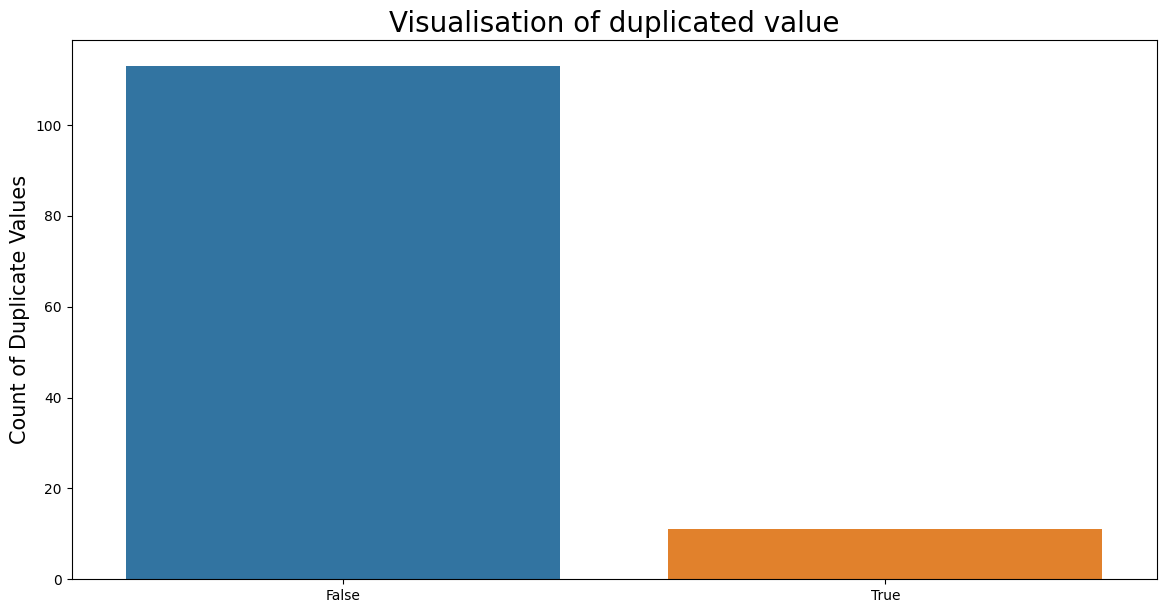

In [ ]:
# Visualizing the duplicate values
plt.figure(figsize=(14,7))
sns.countplot(x=df1.duplicated())
plt.title('Visualisation of duplicated value', fontsize = 20)
plt.ylabel('Count of Duplicate Values', fontsize = 15)
plt.show()

In [ ]:
# Here duplicate values are drop from dataset
df1 = df1.drop_duplicates()
df1

,company,title
0,Lovehoney Group,"Data Analyst, Consumer Marketing"
1,Native Instruments,Data Analyst - Digital Marketing (all genders)
2,Hashtag You,Data & Analytics Lead (m/f/x)
3,GetYourGuide,Senior Data Analyst / Applied Scientist (Brand...
4,hello.de,Werkstudent/ Praktikant - Business Intelligenc...
...,...,...
118,ProPotsdam GmbH,"Business-Analyst*in (m/w/i) – Vollzeit, unbefr..."
119,Babbel,(Senior) MarTech Solutions Engineer (all genders)
121,WTS Advisory,Business Analyst (w/m/d) Financial Services
122,zolar,"Product Manager, Commerce (m/f/d)"


In [ ]:
 # shape of dataset after dropping the duplicates.
df1.shape

(113, 2)

### Missing Values

In [ ]:
#missing value count
missing_value = df1.isnull().sum().sort_values()
missing_value

company    0
title      0
dtype: int64

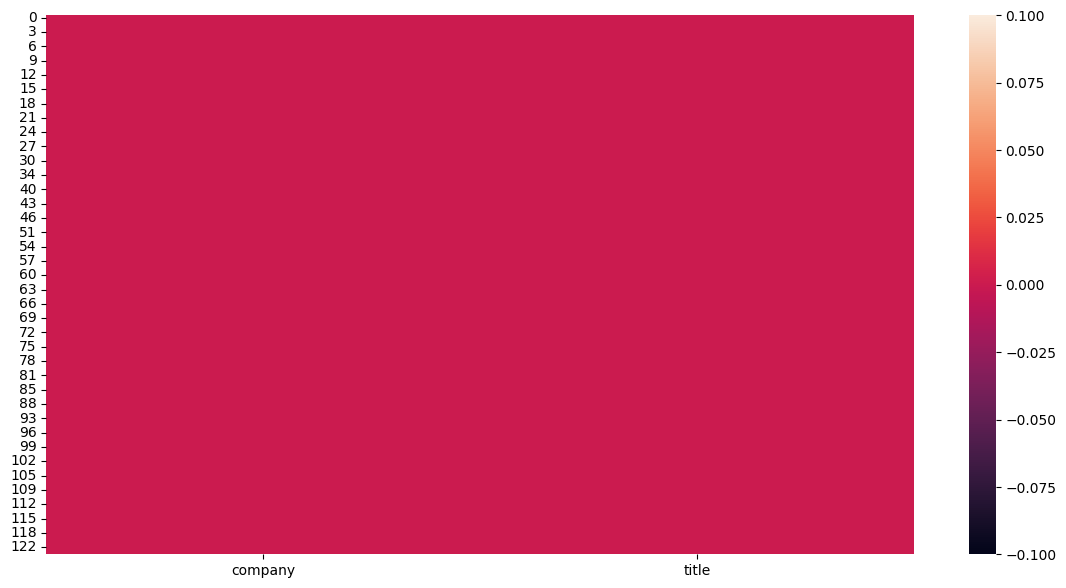

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14,7))
sns.heatmap(df1.isnull())
plt.show()

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# I describe all the unique values using lambda fuction of indivisual column.
print(df1.apply(lambda col: col.unique()))

company    [Lovehoney Group, Native Instruments, Hashtag ...
title      [Data Analyst, Consumer Marketing, Data Analys...
dtype: object


In [ ]:
company_counts = df1['company'].value_counts()
top5company=company_counts.head()
top5company

IU International University of Applied Sciences    7
Deloitte                                           4
GAS German Aviation Service                        4
Universal Music Deutschland                        3
Avaloq                                             3
Name: company, dtype: int64

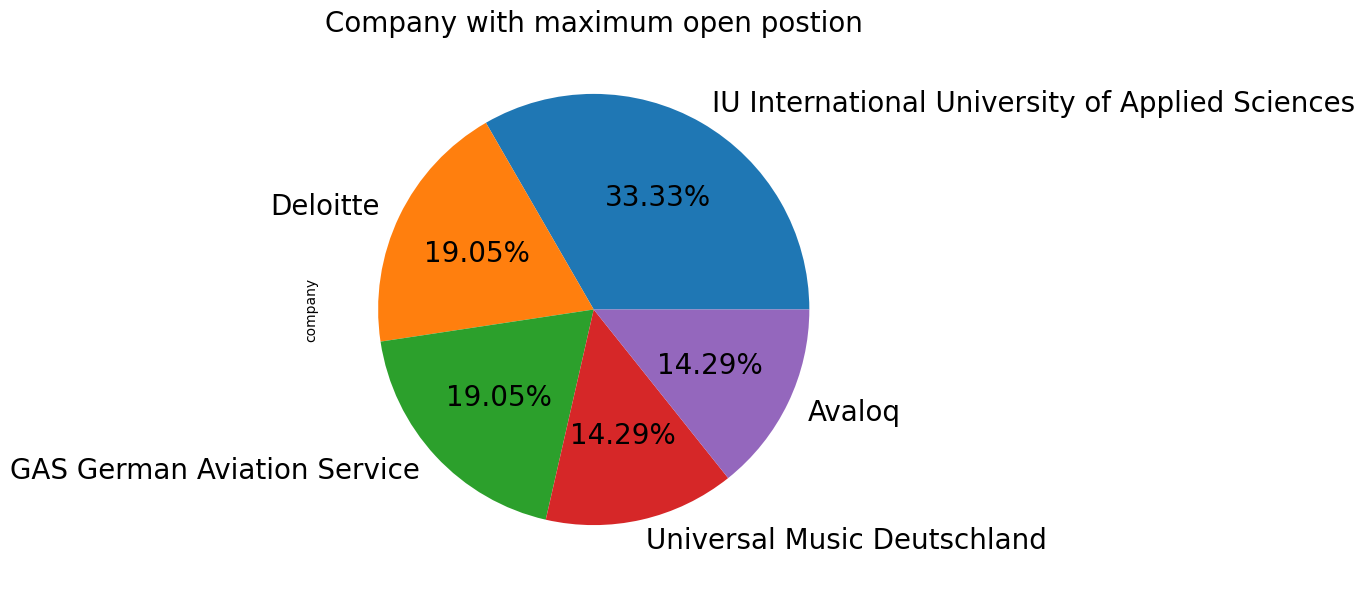

In [ ]:
top5company.plot.pie(autopct='%1.2f%%', shadow=False, figsize=(10,7),fontsize=20)
plt.title('Company with maximum open postion',fontsize = 20)
plt.show()

In [ ]:
no_of_opening_by_company = df1['company'].value_counts().reset_index().rename(columns={'index':'company','company':'title'})[:10]
no_of_opening_by_company

,company,title
0,IU International University of Applied Sciences,7
1,Deloitte,4
2,GAS German Aviation Service,4
3,Universal Music Deutschland,3
4,Avaloq,3
5,GAS German Aviation Service GmbH,3
6,NTT DATA DACH,2
7,BearingPoint,2
8,Babbel,2
9,Amadeus FiRe,2


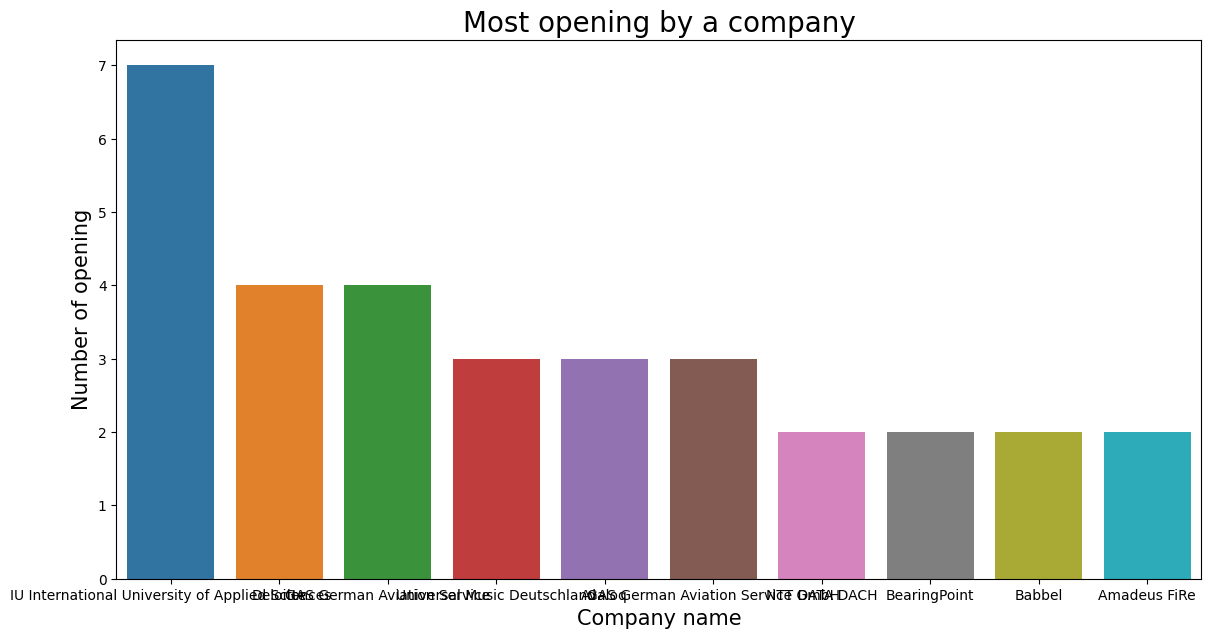

In [ ]:
# barplot is used for visualization
plt.figure(figsize=(14,7))
sns.barplot(x=no_of_opening_by_company['company'],y=no_of_opening_by_company['title'],order=no_of_opening_by_company['company'])
plt.title('Most opening by a company', fontsize=20)
plt.ylabel('Number of opening', fontsize=15)
plt.xlabel('Company name', fontsize=15)
plt.show()

In [ ]:
title_counts = df1['title'].value_counts()
Role_having_maxium_opening=title_counts.head()
Role_having_maxium_opening

Business Analyst (m/w/d)                                                   3
Analyst / Digital Marketing Manager - Market Intelligence (all genders)    2
Business Analyst                                                           2
Business Analyst (w/m/d)                                                   2
Data Analyst, Consumer Marketing                                           1
Name: title, dtype: int64

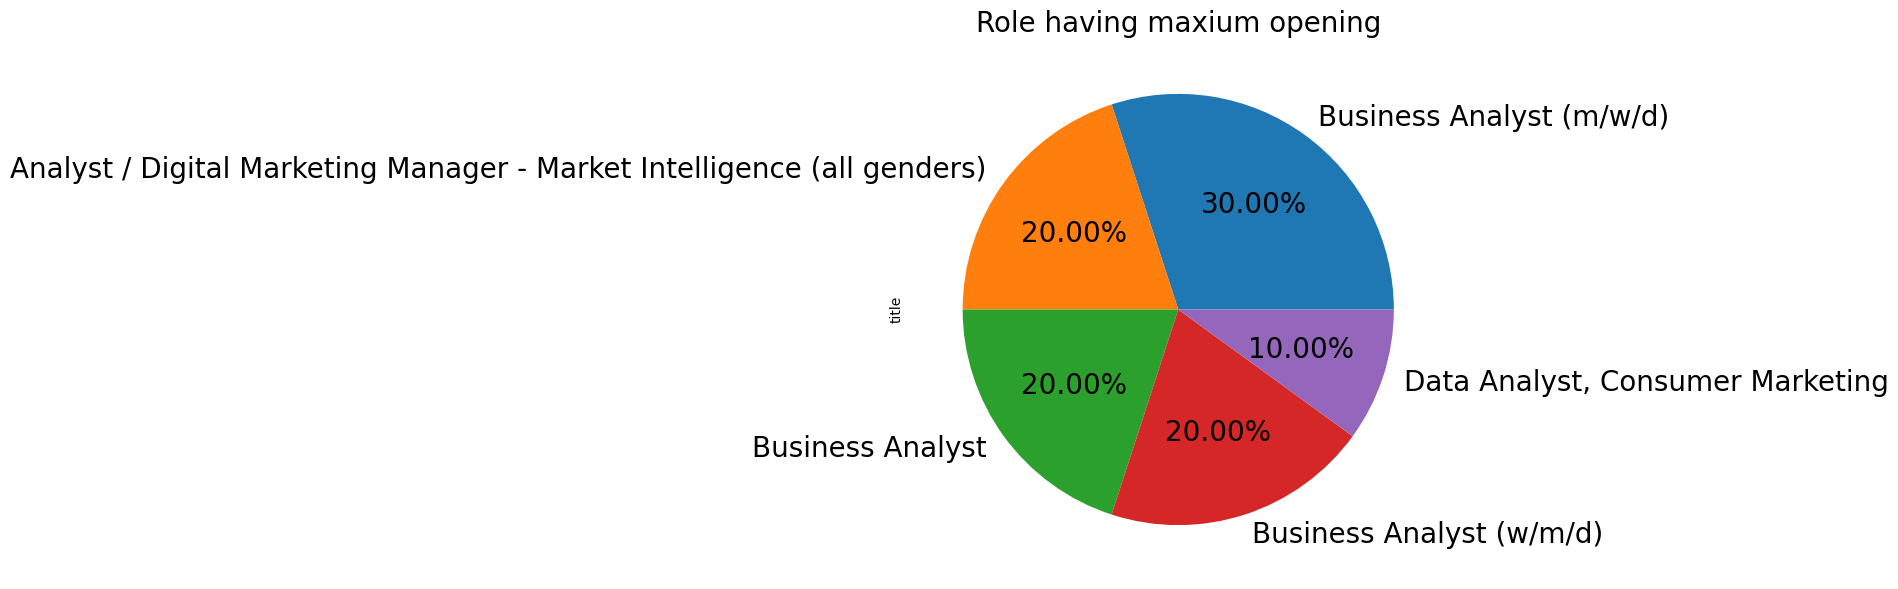

In [ ]:
Role_having_maxium_opening.plot.pie(autopct='%1.2f%%', shadow=False, figsize=(10,7),fontsize=20)
plt.title('Role having maxium opening',fontsize = 20)
plt.show()

# **Conclusion**

In conclusion, the project successfully demonstrated the capability to scrape job listings from LinkedIn, process the data, and derive meaningful insights. The tool can be a valuable resource for professionals, job seekers, and recruiters looking to navigate the data science job landscape. It offers a comprehensive view of job demand, qualifications, salaries, and more, allowing users to make informed decisions in the field of analytics.

The project's web scraping and data analysis techniques can be extended to other job platforms and industries, providing valuable insights into various job markets. Further refinements, such as the addition of more sources and advanced analytics, can enhance the tool's capabilities.